## Importing the libraries

In [138]:
import pandas as pd
import requests
import json
import os
import glob

import hvplot.pandas 

import matplotlib.pyplot as plt
import seaborn as sns



### Read Data from Intraday CSV Files

In [139]:
# Initialize empty DataFrames to store intraday data for each seperate stock ticker
AAPL_data_df    = pd.DataFrame()
AMZN_data_df    = pd.DataFrame()
GOOG_data_df    = pd.DataFrame()
GOOGL_data_df   = pd.DataFrame()
META_data_df    = pd.DataFrame()
NFLX_data_df    = pd.DataFrame()

# Loop through all Intraday Stock files in the Datasets folder
for file in os.listdir("../Datasets"):
    if file.startswith("AAPL_intraday"):
        temp_df = pd.read_csv("../Datasets/" + file)
        AAPL_data_df = pd.concat([AAPL_data_df, temp_df])
        AAPL_data_df["ticker"] = "AAPL"
        AAPL_data_df = AAPL_data_df.drop('Unnamed: 0', axis=1)
    elif file.startswith("AMZN_intraday"):
        temp_df = pd.read_csv("../Datasets/" + file)
        AMZN_data_df = pd.concat([AMZN_data_df, temp_df])
        AMZN_data_df["ticker"] = "AMZN"
        AMZN_data_df = AMZN_data_df.drop('Unnamed: 0', axis=1)
    elif file.startswith("GOOG_intraday"):
        temp_df = pd.read_csv("../Datasets/" + file)
        GOOG_data_df = pd.concat([GOOG_data_df, temp_df])
        GOOG_data_df["ticker"] = "GOOG"
        GOOG_data_df = GOOG_data_df.drop('Unnamed: 0', axis=1)
    elif file.startswith("GOOGL_intraday"):
        temp_df = pd.read_csv("../Datasets/" + file)
        GOOGL_data_df = pd.concat([GOOGL_data_df, temp_df])
        GOOGL_data_df["ticker"] = "GOOGL"
        GOOGL_data_df = GOOGL_data_df.drop('Unnamed: 0', axis=1)
    elif file.startswith("META_intraday"):
        temp_df = pd.read_csv("../Datasets/" + file)
        META_data_df = pd.concat([META_data_df, temp_df])
        META_data_df["ticker"] = "META"
        META_data_df = META_data_df.drop('Unnamed: 0', axis=1)
    elif file.startswith("NFLX_intraday"):
        temp_df = pd.read_csv("../Datasets/" + file)
        NFLX_data_df = pd.concat([NFLX_data_df, temp_df])
        NFLX_data_df["ticker"] = "NFLX"
        NFLX_data_df = NFLX_data_df.drop('Unnamed: 0', axis=1)


# Concatenate all Stock data into one DataFrame

In [140]:
# Find the data type of each column
Data_Combined_df = pd.concat([AAPL_data_df, AMZN_data_df, GOOG_data_df, GOOGL_data_df, META_data_df, NFLX_data_df])
Data_Combined_df.dtypes

# Convert timestamp column to datetime
Data_Combined_df['timestamp'] = pd.to_datetime(Data_Combined_df['timestamp'])
Data_Combined_df.dtypes


timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume                int64
ticker               object
dtype: object

## Data Processing in the combined dataframe

In [94]:

Data_Combined_df = pd.concat([AAPL_data_df, AMZN_data_df, GOOG_data_df, GOOGL_data_df, META_data_df, NFLX_data_df])

# Convert timestamp column to datetime
Data_Combined_df['timestamp'] = pd.to_datetime(Data_Combined_df['timestamp'])

# Drop any duplicates
Data_Combined_df = Data_Combined_df.drop_duplicates()

# Drop any rows with missing data
Data_Combined_df = Data_Combined_df.dropna()

# Count of rows in combined DataFrame
Data_Combined_df.shape[0]

# Add a new column that contains ONLY the Hour from timestamp column
Data_Combined_df["time"] = Data_Combined_df["timestamp"].apply(lambda x: x.hour)

# Set index to timestamp
Data_Combined_df = Data_Combined_df.set_index("timestamp")

# Calculate the mean of the High and Low columns and round to the nearest 2 decimal places
Data_Combined_df["Avg. Price"] = round( (Data_Combined_df["high"] + Data_Combined_df["low"]) / 2, 3)

Data_Combined_df.head()

,open,high,low,close,volume,ticker,time,Avg. Price
timestamp,,,,,,,,
2023-01-31 19:00:00,143.010,143.147,142.837,143.004,38961,AAPL,19,142.992
2023-01-31 18:00:00,143.110,143.117,142.966,143.014,26447,AAPL,18,143.041
2023-01-31 17:00:00,142.931,143.286,142.916,143.084,49288,AAPL,17,143.101
2023-01-31 16:00:00,143.498,143.634,142.886,142.935,18914803,AAPL,16,143.260
2023-01-31 15:00:00,143.070,143.545,142.320,143.502,10193341,AAPL,15,142.932


In [5]:
# Create a new DataFrame that contains only the ticker, time, and avg. price columns
Avg_Price_df = Data_Combined_df[["ticker", "time", "Avg. Price"]]
Avg_Price_df.head()


# Delete timestamp index and create a new index for the time
Avg_Price_df = Avg_Price_df.reset_index(drop=True)
Avg_Price_df = Avg_Price_df.set_index("time")

# number of rows in Avg_Price_df
Avg_Price_df.shape[0]

Avg_Price_df.head()


,ticker,Avg. Price
time,,
19,AAPL,142.992
18,AAPL,143.041
17,AAPL,143.101
16,AAPL,143.260
15,AAPL,142.932


### Building the data visualization

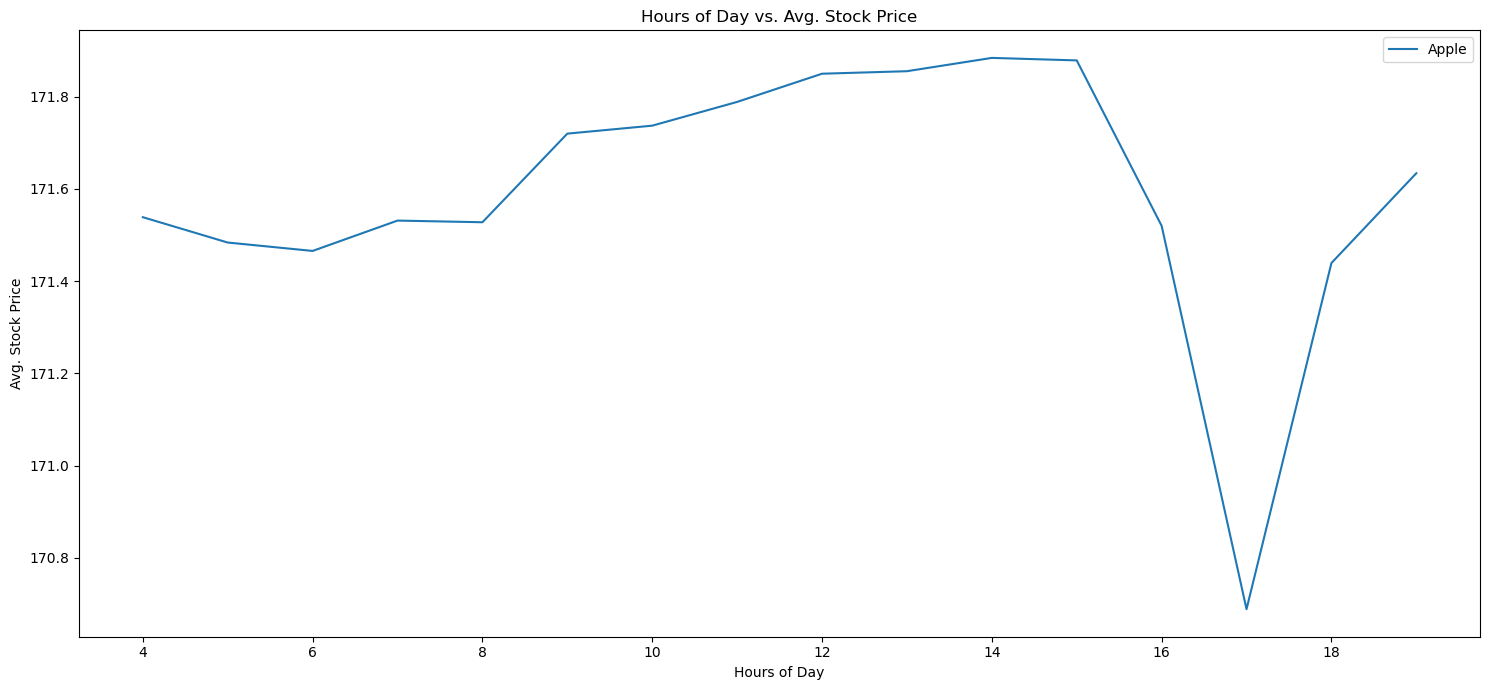

In [141]:
#Create a new DataFrame that contains only the data only for each ticker
AAPL_Avg_Price_df = Avg_Price_df[Avg_Price_df["ticker"] == "AAPL"]
AMZN_Avg_Price_df = Avg_Price_df[Avg_Price_df["ticker"] == "AMZN"]
GOOG_Avg_Price_df = Avg_Price_df[Avg_Price_df["ticker"] == "GOOG"]
GOOGL_Avg_Price_df = Avg_Price_df[Avg_Price_df["ticker"] == "GOOGL"]
META_Avg_Price_df = Avg_Price_df[Avg_Price_df["ticker"] == "META"]
NFLX_Avg_Price_df = Avg_Price_df[Avg_Price_df["ticker"] == "NFLX"]


#count of rows in AAPL_Avg_Price_df
AAPL_Avg_Price_df.shape[0]


# Plot the mean of 'Avg. Price' by time
plt.figure(figsize=(15, 7))
plt.cla()

plt.plot(AAPL_Avg_Price_df.groupby('time')['Avg. Price'].mean(), label='Apple')
plt.title('Hours of Day vs. Avg. Stock Price')
plt.xlabel('Hours of Day')
plt.ylabel('Avg. Stock Price')

plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [118]:
# Use plt.bar to plot the mean of 'Avg. Price' by time for AAPL_Avg_Price_df

# count of rows in AAPL_Avg_Price_df
AAPL_Avg_Price_df.shape[0]
AAPL_Avg_Price_df.head()

# Create a bar chart based off of the group series from before
# plt.bar(AAPL_Avg_Price_df.groupby('time')['Avg. Price'].mean().index, AAPL_Avg_Price_df.groupby('time')['Avg. Price'].mean(), color='r', alpha=0.5, align="center")

# Create a new DataFrame from AAPL_Avg_Price_df that contains the mean of 'Avg. Price' by time
AAPL_Mean_Price_df = AAPL_Avg_Price_df.groupby('time')['Avg. Price'].mean().to_frame()
AAPL_Mean_Price_df.head(20)

# Print the max value of 'Avg. Price' in AAPL_Mean_Price_df
print(AAPL_Mean_Price_df['Avg. Price'].max())

# Covert the index of AAPL_Mean_Price_df to a column
AAPL_Mean_Price_df = AAPL_Mean_Price_df.reset_index()
AAPL_Mean_Price_df.head(2)




171.88400438596491


,time,Avg. Price
0,4,171.538526
1,5,171.483544


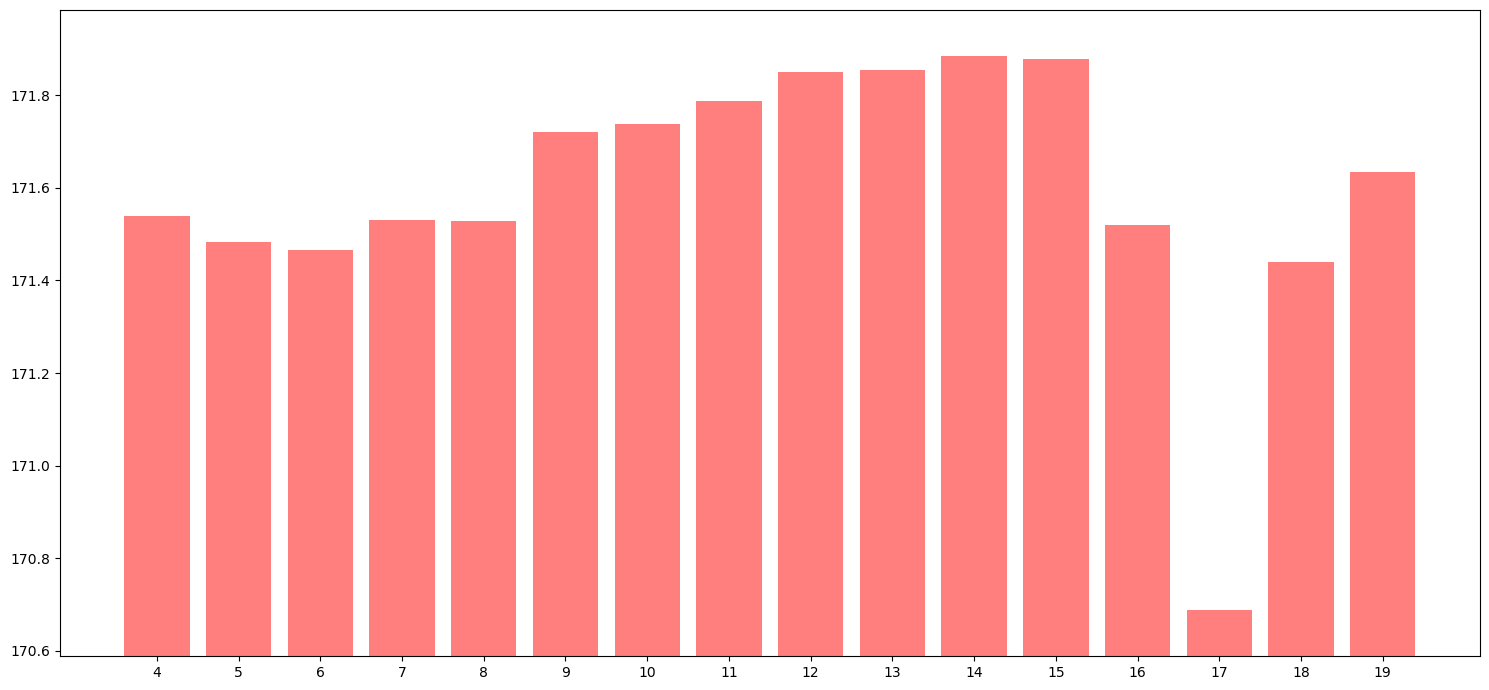

In [8]:
plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.autolayout"] = True
max_y_lim = AAPL_Mean_Price_df['Avg. Price'].max() + 0.1
min_y_lim = AAPL_Mean_Price_df['Avg. Price'].min() - 0.1
plt.ylim(min_y_lim, max_y_lim)
plt.bar(AAPL_Mean_Price_df['time'], AAPL_Mean_Price_df['Avg. Price'], color='r', alpha=0.5, align="center")
plt.xticks(AAPL_Mean_Price_df['time'])
plt.show()

In [117]:
Data_Combined_df.head()

# Create a new DataFrame that has time as the index
Temp_df = Data_Combined_df.set_index("time")
Temp_df.head()

# Create a new DataFrame from Temp_df for each ticker
AAPL_df = Temp_df[Temp_df["ticker"] == "AAPL"]
AMZN_df = Temp_df[Temp_df["ticker"] == "AMZN"]
GOOG_df = Temp_df[Temp_df["ticker"] == "GOOG"]
GOOGL_df = Temp_df[Temp_df["ticker"] == "GOOGL"]
META_df = Temp_df[Temp_df["ticker"] == "META"]
NFLX_df = Temp_df[Temp_df["ticker"] == "NFLX"]

# Create a new DataFrame for each after deleting the ticker column
AAPL_df = AAPL_df.drop("ticker", axis=1)
AMZN_df = AMZN_df.drop("ticker", axis=1)
GOOG_df = GOOG_df.drop("ticker", axis=1)
GOOGL_df = GOOGL_df.drop("ticker", axis=1)
META_df = META_df.drop("ticker", axis=1)
NFLX_df = NFLX_df.drop("ticker", axis=1)

# Create a new dataframe from AAPL_df that contains the mean of each column by time 3 decimal places
AAPL_Mean_df = AAPL_df.groupby("time").mean().round(3)
AMZN_Mean_df = AMZN_df.groupby("time").mean().round(3)
GOOG_Mean_df = GOOG_df.groupby("time").mean().round(3)
GOOGL_Mean_df = GOOGL_df.groupby("time").mean().round(3)
META_Mean_df = META_df.groupby("time").mean().round(3)
NFLX_Mean_df = NFLX_df.groupby("time").mean().round(3)

Data_Combined_df.head()

,open,high,low,close,volume,ticker,time,Avg. Price
timestamp,,,,,,,,
2023-01-31 19:00:00,143.010,143.147,142.837,143.004,38961,AAPL,19,142.992
2023-01-31 18:00:00,143.110,143.117,142.966,143.014,26447,AAPL,18,143.041
2023-01-31 17:00:00,142.931,143.286,142.916,143.084,49288,AAPL,17,143.101
2023-01-31 16:00:00,143.498,143.634,142.886,142.935,18914803,AAPL,16,143.260
2023-01-31 15:00:00,143.070,143.545,142.320,143.502,10193341,AAPL,15,142.932


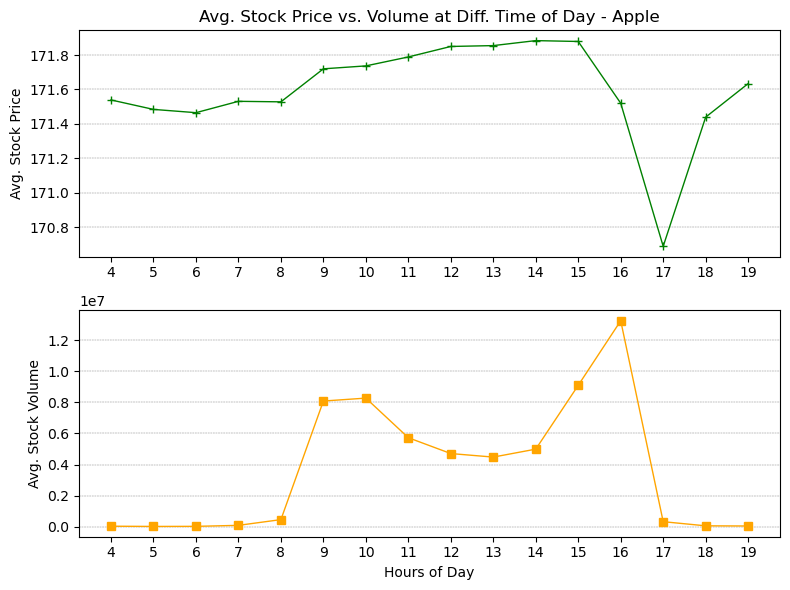

In [23]:
# Avg. Stock Price vs. Volume at Diff. Time of Day for Apple

plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
plt.subplot(2, 1, 1)
plt.plot(AAPL_Mean_df.index, AAPL_Mean_df['Avg. Price'], marker="+",color="green", linewidth=1)
plt.title('Avg. Stock Price vs. Volume at Diff. Time of Day - Apple')
plt.ylabel('Avg. Stock Price')
plt.xticks(AAPL_Mean_df.index)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.35)
plt.subplot(2, 1, 2)
plt.plot(AAPL_Mean_df.index, AAPL_Mean_df['volume'], marker="s", color="orange", linewidth=1)
plt.xlabel('Hours of Day')
plt.ylabel('Avg. Stock Volume')
plt.xticks(AAPL_Mean_df.index)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.35)
plt.tight_layout()
plt.savefig("../Images/Avg. Stock Price vs. Volume at Diff. Time of Day for Apple.png")
plt.show()

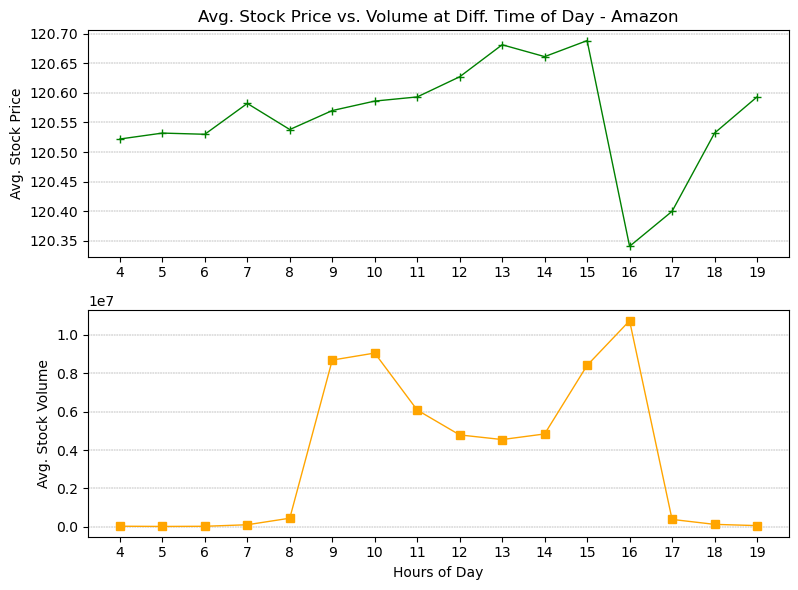

In [24]:
# Avg. Stock Price vs. Volume at Diff. Time of Day for Amazon

plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
plt.subplot(2, 1, 1)
plt.plot(AMZN_Mean_df.index, AMZN_Mean_df['Avg. Price'], marker="+",color="green", linewidth=1)
plt.title('Avg. Stock Price vs. Volume at Diff. Time of Day - Amazon')
plt.ylabel('Avg. Stock Price')
plt.xticks(AMZN_Mean_df.index)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.35)
plt.subplot(2, 1, 2)
plt.plot(AMZN_Mean_df.index, AMZN_Mean_df['volume'], marker="s", color="orange", linewidth=1)
plt.xlabel('Hours of Day')
plt.ylabel('Avg. Stock Volume')
plt.xticks(AMZN_Mean_df.index)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.35)
plt.tight_layout()
plt.savefig("../Images/Avg. Stock Price vs. Volume at Diff. Time of Day for Amazon.png")
plt.show()


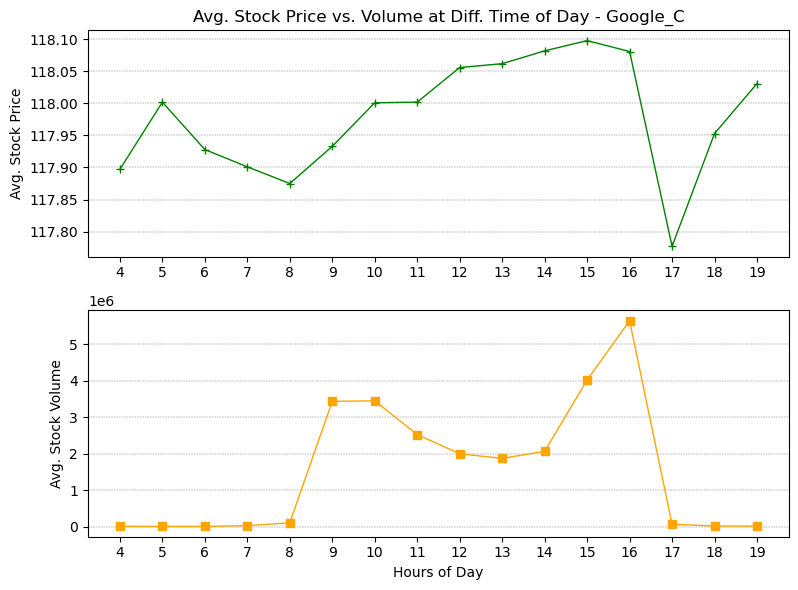

In [36]:
# Avg. Stock Price vs. Volume at Diff. Time of Day for Google_C

plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
plt.subplot(2, 1, 1)
plt.plot(GOOG_Mean_df.index, GOOG_Mean_df['Avg. Price'], marker="+",color="green", linewidth=1)
plt.title('Avg. Stock Price vs. Volume at Diff. Time of Day - Google_C')
plt.ylabel('Avg. Stock Price')
plt.xticks(GOOG_Mean_df.index)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.35)

plt.subplot(2, 1, 2)
plt.plot(GOOG_Mean_df.index, GOOG_Mean_df['volume'], marker="s", color="orange", linewidth=1)
plt.xlabel('Hours of Day')
plt.ylabel('Avg. Stock Volume')
plt.xticks(GOOG_Mean_df.index)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.35)
plt.tight_layout()
plt.savefig("../Images/Avg. Stock Price vs. Volume at Diff. Time of Day for Google_C.png")
plt.show()


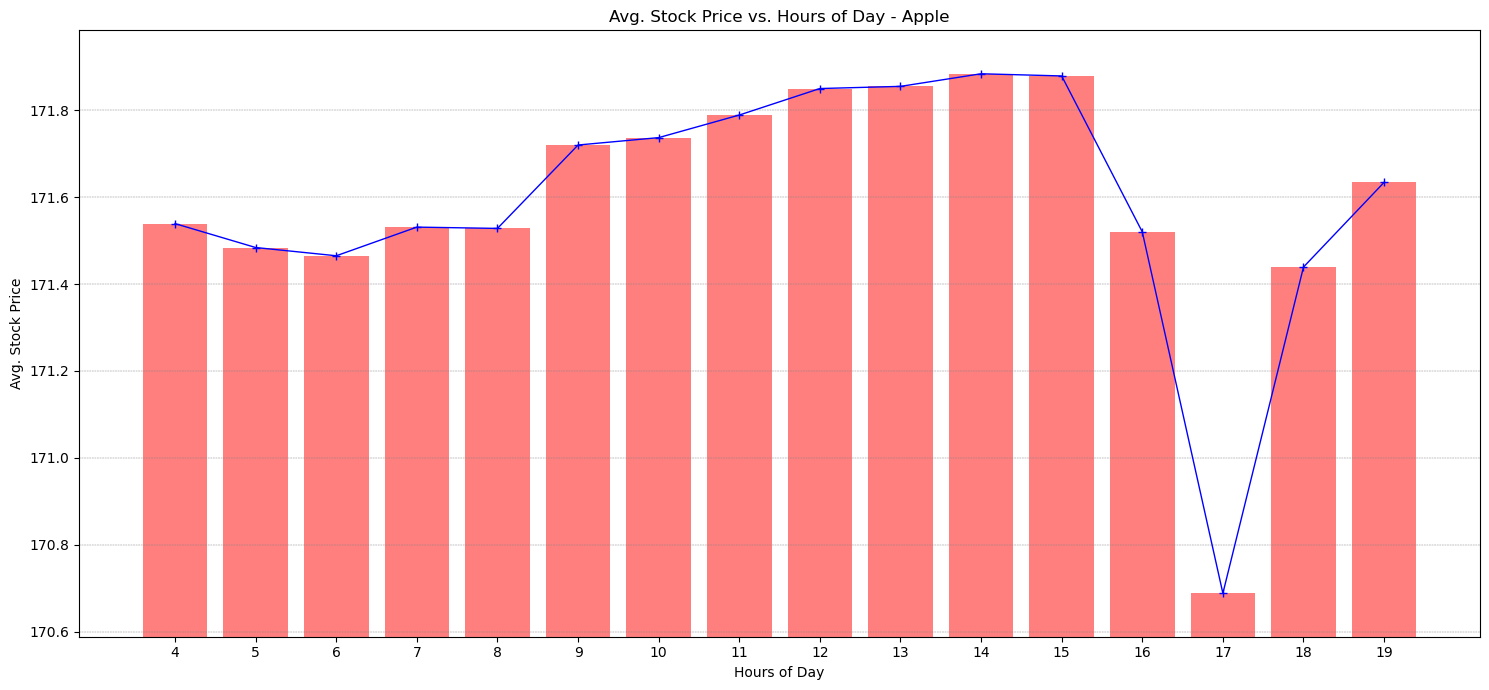

In [136]:
# Plot a bar for Avg. Price by time for Apple
plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.autolayout"] = True
max_y_lim = AAPL_Mean_df['Avg. Price'].max() + 0.1
min_y_lim = AAPL_Mean_df['Avg. Price'].min() - 0.1
plt.ylim(min_y_lim, max_y_lim)

plt.bar(AAPL_Mean_df.index,  AAPL_Mean_df['Avg. Price'], color='r', alpha=0.5, align="center")
plt.plot(AAPL_Mean_df.index, AAPL_Mean_df['Avg. Price'], marker="+",color="blue", linewidth=1)

plt.xticks(AAPL_Mean_df.index)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.35)
plt.xlabel('Hours of Day')
plt.ylabel('Avg. Stock Price')
plt.title('Avg. Stock Price vs. Hours of Day - Apple')
plt.show()

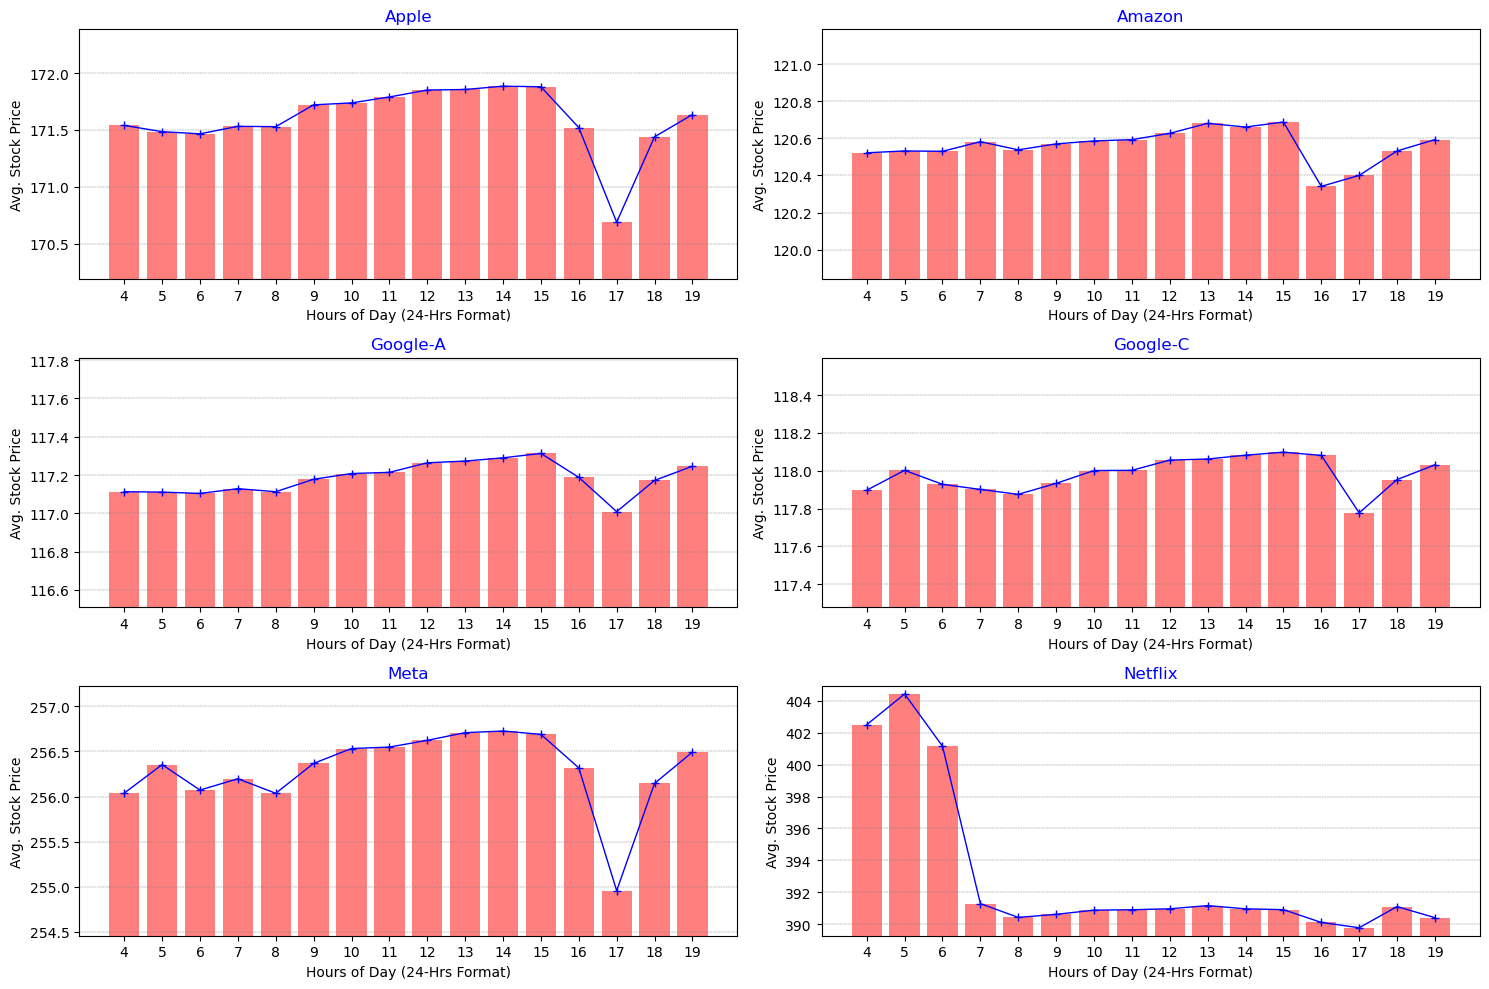

In [74]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
stocks = ['Apple', 'Amazon', 'Google-A', 'Google-C', 'Meta', 'Netflix']
data_frames = [AAPL_Mean_df, AMZN_Mean_df, GOOGL_Mean_df, GOOG_Mean_df, META_Mean_df, NFLX_Mean_df]

for i, ax in enumerate(axes.flatten()):
    if i < len(stocks):
        max_y_lim = (data_frames[i]['Avg. Price']).max() + 0.5
        min_y_lim = (data_frames[i]['Avg. Price']).min() - 0.5
        ax.set_ylim(min_y_lim, max_y_lim)
        ax.bar(data_frames[i].index,  data_frames[i]['Avg. Price'], color='r', alpha=0.5, align="center")
        ax.plot(data_frames[i].index, data_frames[i]['Avg. Price'], marker="+",color="blue", linewidth=1)
        ax.set_xticks(data_frames[i].index)
        ax.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.35)
        ax.set_xlabel('Hours of Day (24-Hrs Format)')
        ax.set_ylabel('Avg. Stock Price')
        ax.set_title(stocks[i], color='blue')
plt.tight_layout()
plt.savefig("../Images/FAANG Stocks - Mean Price at diff. Hrs of Day.png")
plt.show()


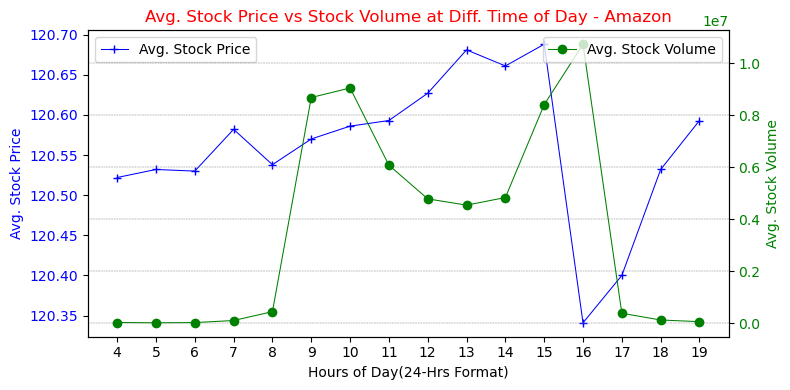

In [80]:
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plotting Avg. Stock Price on the first y-axis (left)
ax1.plot(AMZN_Mean_df.index, AMZN_Mean_df['Avg. Price'], label='Avg. Stock Price', marker="+",color="blue", linewidth=.75)
ax1.set_ylabel('Avg. Stock Price', color='blue')
ax1.set_xlabel('Hours of Day(24-Hrs Format)')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(AMZN_Mean_df.index)
ax1.legend(loc='upper left') 

# Plotting Avg. Stock Volume on the 2nd y-axis (left)
ax2 = ax1.twinx()
ax2.plot(AMZN_Mean_df.index, AMZN_Mean_df['volume'], label='Avg. Stock Volume', marker="o", color="green", linewidth=.75)
ax2.set_ylabel('Avg. Stock Volume', color='green')
ax2.tick_params(axis='y', labelcolor='green') 
ax2.set_xticks(AMZN_Mean_df.index)
ax2.legend(loc='upper right') 
plt.title('Avg. Stock Price vs Stock Volume at Diff. Time of Day - Amazon', color='red')
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.35)
plt.tight_layout()
plt.savefig("../Images/Avg. Stock Price vs. Volume at Diff. Time of Day for Amazon.png")
plt.show()

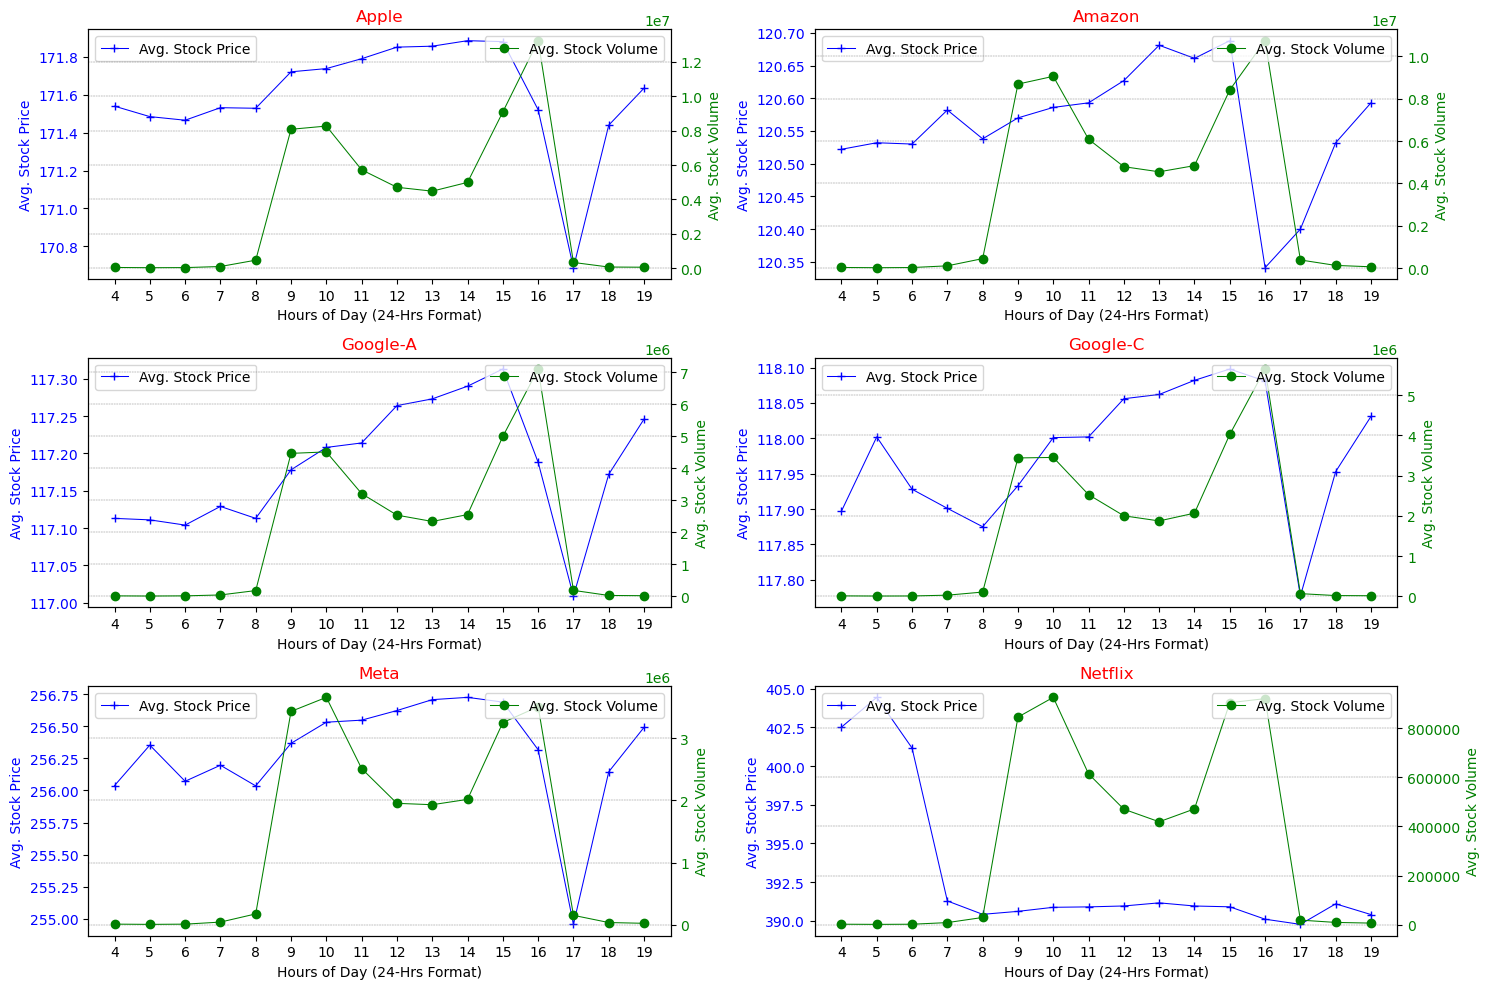

In [76]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
stocks = ['Apple', 'Amazon', 'Google-A', 'Google-C', 'Meta', 'Netflix']
data_frames = [AAPL_Mean_df, AMZN_Mean_df, GOOGL_Mean_df, GOOG_Mean_df, META_Mean_df, NFLX_Mean_df]

for i, ax1 in enumerate(axes.flatten()):
    if i < len(stocks):

        # Plotting Avg. Stock Price on the first y-axis (left)
        ax1.plot(data_frames[i].index, data_frames[i]['Avg. Price'], label='Avg. Stock Price', marker="+",color="blue", linewidth=.75)
        ax1.set_ylabel('Avg. Stock Price', color='blue')
        ax1.set_xlabel('Hours of Day (24-Hrs Format)')
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1.set_xticks(data_frames[i].index)
        ax1.legend(loc='upper left') 
        ax1.set_title(stocks[i], color='red')
        
        # Plotting Avg. Stock Volume on the 2nd y-axis (left)
        ax2 = ax1.twinx()
        ax2.plot(data_frames[i].index, data_frames[i]['volume'], label='Avg. Stock Volume', marker="o", color="green", linewidth=.75)
        ax2.set_ylabel('Avg. Stock Volume', color='green')
        ax2.tick_params(axis='y', labelcolor='green')
        ax2.set_xticks(data_frames[i].index)
        ax2.legend(loc='upper right')
        ax2.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.35)
        #ax2.set_title(stocks[i], color='blue')



plt.tight_layout()
plt.savefig("../Images/FAANG Stocks - Avg. Stock Price & Volume at Diff. Time of Day.png")
plt.show()


Data Preparation to find the Corelation between the stocks based on Intraday Average Price Data


In [119]:
# Main Combined data frame
Data_Combined_df.head()

# create a new dataframe from Data_Combined_df that contains open, high, low, close, volume & Avg. Price columns
All_Stocks_df = Data_Combined_df[["ticker", "open", "high", "low", "close", "volume", "Avg. Price"]]
All_Stocks_df.head()

# create a temp dataframes from Data_Combined_df that contains open, high, low, close, volume & Avg. Price columns for each stock
AAPL_Temp_df = All_Stocks_df[All_Stocks_df["ticker"] == "AAPL"]
AMZN_Temp_df = All_Stocks_df[All_Stocks_df["ticker"] == "AMZN"]
GOOGL_Temp_df = All_Stocks_df[All_Stocks_df["ticker"] == "GOOGL"]
GOOG_Temp_df = All_Stocks_df[All_Stocks_df["ticker"] == "GOOG"]
META_Temp_df = All_Stocks_df[All_Stocks_df["ticker"] == "META"]
NFLX_Temp_df = All_Stocks_df[All_Stocks_df["ticker"] == "NFLX"]

# Create a new transposed dataframe that contains Avg. Price for each stock
All_Stocks_Price_Transpose_df = pd.concat(
    [
    AAPL_Temp_df['Avg. Price'], 
    AMZN_Temp_df['Avg. Price'], 
    GOOGL_Temp_df['Avg. Price'], 
    GOOG_Temp_df['Avg. Price'], 
    META_Temp_df['Avg. Price'], 
    NFLX_Temp_df['Avg. Price']
    ], 
    axis='columns', 
    keys=['Apple', 'Amazon', 'Google_A', 'Google_C', 'Meta', 'Netflix']
    )



corr_data_all_stocks = All_Stocks_Price_Transpose_df.corr()
corr_data_all_stocks
Data_Combined_df.head()


,Apple,Amazon,Google_A,Google_C,Meta,Netflix
timestamp,,,,,,
2023-01-03 04:00:00,130.143,85.155,89.175,89.600,121.705,298.565
2023-01-03 05:00:00,130.372,85.445,89.580,90.000,122.200,299.300
2023-01-03 06:00:00,129.925,85.015,89.115,89.565,121.625,296.210
2023-01-03 07:00:00,129.666,84.635,88.985,89.525,121.260,297.000
2023-01-03 08:00:00,129.705,84.800,89.015,89.594,121.555,297.020


### Correlation Data Viz. between the stocks based on Intraday Average Price Data

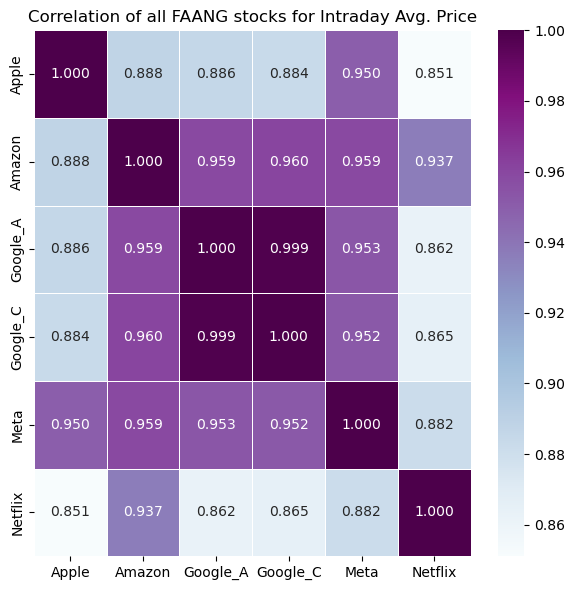

In [114]:
# Visualizing Correlation
plt.figure(figsize=(6,6))
ax = sns.heatmap(corr_data_all_stocks, annot=True, linewidth=.5, fmt='.3f', cmap='BuPu')
ax.set(xlabel="", ylabel="")
ax.set_title('Correlation of all FAANG stocks for Intraday Avg. Price')
ax.xaxis.tick_bottom()
plt.tight_layout()
plt.savefig("../Images/seaborn correlation heatmap for all Stocks - Intraday Avg. Price.png")
plt.show()